In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from google.colab import files
import io

print("✅ Libraries imported successfully!")

# UPLOAD THE DATASET
print("📁 Please upload train.csv file:")
print("Click 'Choose Files' and select train.csv from your computer")
uploaded = files.upload()

# Load the dataset
train = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))
print("✅ Dataset loaded successfully!")

✅ Libraries imported successfully!
📁 Please upload train.csv file:
Click 'Choose Files' and select train.csv from your computer


Saving train.csv to train.csv
✅ Dataset loaded successfully!


In [ ]:

print("📊 Checking dataset...")
print(f"Dataset shape: {train.shape}")
print(f"Columns available: {train.columns.tolist()}")

# Check if we have the required columns
required_cols = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']
print("\n🔍 Checking for required columns:")
for col in required_cols:
    if col in train.columns:
        print(f"✅ Found: {col}")
    else:
        print(f"❌ Missing: {col}")

print(f"\n📋 First 3 rows:")
print(train.head(3))

📊 Checking dataset...
Dataset shape: (1460, 81)
Columns available: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF'

In [ ]:

print("🔄 Preparing features...")

# Create total bathrooms feature
train['TotalBath'] = train['FullBath'] + (0.5 * train['HalfBath'])

# Select our three features
X = train[['GrLivArea', 'BedroomAbvGr', 'TotalBath']]
y = train['SalePrice']

print("✅ Features we're using:")
print("1. GrLivArea - Square footage")
print("2. BedroomAbvGr - Number of bedrooms")
print("3. TotalBath - Total bathrooms")
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Handle any missing values
X = X.fillna(X.mean())
print("✅ Missing values handled")

🔄 Preparing features...
✅ Features we're using:
1. GrLivArea - Square footage
2. BedroomAbvGr - Number of bedrooms
3. TotalBath - Total bathrooms
X shape: (1460, 3), y shape: (1460,)
✅ Missing values handled


🔍 Exploring relationships...


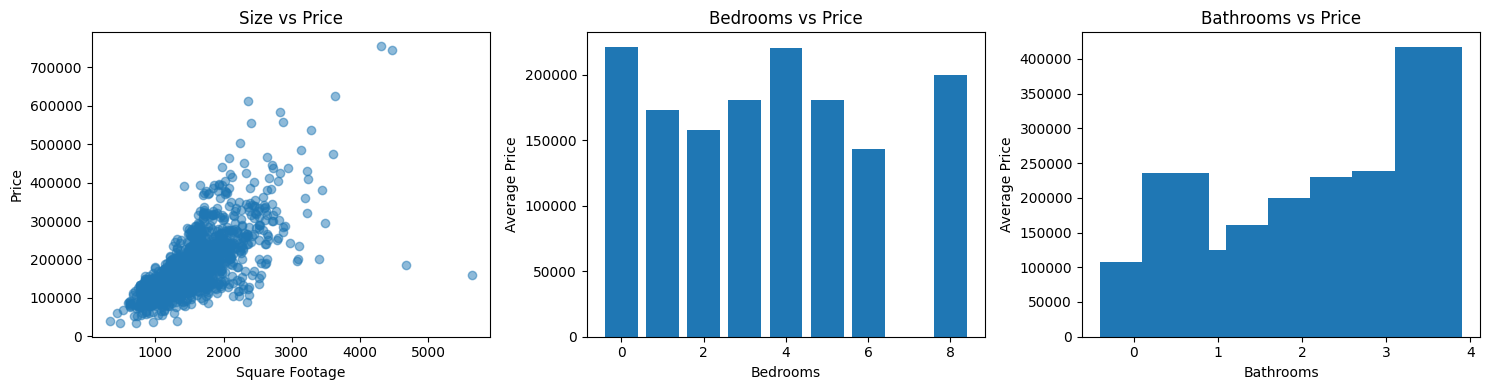


📈 Correlation with Price:
Square Footage: 0.709
Bedrooms: 0.168
Bathrooms: 0.598


In [ ]:

print("🔍 Exploring relationships...")

# Create visualization
plt.figure(figsize=(15, 4))

# Plot 1: Square footage vs Price
plt.subplot(1, 3, 1)
plt.scatter(X['GrLivArea'], y, alpha=0.5)
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Size vs Price')

# Plot 2: Bedrooms vs Price
plt.subplot(1, 3, 2)
bedroom_price = train.groupby('BedroomAbvGr')['SalePrice'].mean()
plt.bar(bedroom_price.index, bedroom_price.values)
plt.xlabel('Bedrooms')
plt.ylabel('Average Price')
plt.title('Bedrooms vs Price')

# Plot 3: Bathrooms vs Price
plt.subplot(1, 3, 3)
bath_price = train.groupby('TotalBath')['SalePrice'].mean()
plt.bar(bath_price.index, bath_price.values)
plt.xlabel('Bathrooms')
plt.ylabel('Average Price')
plt.title('Bathrooms vs Price')

plt.tight_layout()
plt.show()

# Show correlations
print("\n📈 Correlation with Price:")
print(f"Square Footage: {X['GrLivArea'].corr(y):.3f}")
print(f"Bedrooms: {X['BedroomAbvGr'].corr(y):.3f}")
print(f"Bathrooms: {X['TotalBath'].corr(y):.3f}")

In [ ]:

print("📊 Splitting data...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print("✅ Data split completed")

📊 Splitting data...
Training samples: 1168
Testing samples: 292
✅ Data split completed


In [ ]:

print("⚖️ Scaling features...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature scaling completed!")

⚖️ Scaling features...
✅ Feature scaling completed!


In [ ]:

print("🤖 Training Linear Regression model...")

model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("✅ Model trained successfully!")

# Show the learned coefficients
print("\n📈 What the model learned:")
print(f"Square Footage coefficient: {model.coef_[0]:.2f}")
print(f"Bedrooms coefficient: {model.coef_[1]:.2f}")
print(f"Bathrooms coefficient: {model.coef_[2]:.2f}")
print(f"Base price (intercept): ${model.intercept_:.2f}")

print("\n💡 Interpretation:")
print("Positive coefficients = feature increases price")
print("Larger values = stronger influence on price")

🤖 Training Linear Regression model...
✅ Model trained successfully!

📈 What the model learned:
Square Footage coefficient: 52754.68
Bedrooms coefficient: -21436.61
Bathrooms coefficient: 17063.22
Base price (intercept): $181441.54

💡 Interpretation:
Positive coefficients = feature increases price
Larger values = stronger influence on price


In [ ]:

print("📊 Evaluating model performance...")

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("📈 Performance Metrics:")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Testing R² Score: {test_r2:.4f}")
print(f"Training RMSE: ${train_rmse:,.2f}")
print(f"Testing RMSE: ${test_rmse:,.2f}")

print("\n💡 What this means:")
print("R² closer to 1.0 = better model")
print("RMSE = average prediction error in dollars")

📊 Evaluating model performance...
📈 Performance Metrics:
Training R² Score: 0.5623
Testing R² Score: 0.6286
Training RMSE: $51,092.94
Testing RMSE: $53,371.56

💡 What this means:
R² closer to 1.0 = better model
RMSE = average prediction error in dollars


📈 Creating visualizations...


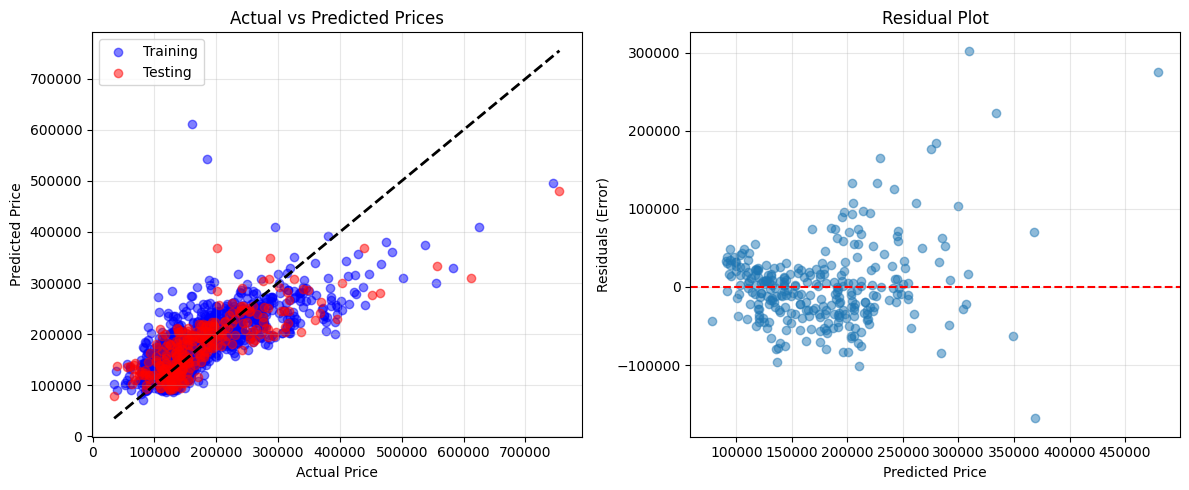

✅ Visualizations created!


In [ ]:

print("📈 Creating visualizations...")

# Plot actual vs predicted
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5, color='blue', label='Training')
plt.scatter(y_test, y_test_pred, alpha=0.5, color='red', label='Testing')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Error)')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Visualizations created!")

In [ ]:

print("🎯 Making example predictions...")

# Create some example houses
example_houses = pd.DataFrame({
    'GrLivArea': [1200, 1800, 2400, 3000],
    'BedroomAbvGr': [2, 3, 4, 4],
    'TotalBath': [1.0, 2.0, 2.5, 3.5]
})

print("Example houses:")
print(example_houses)

# Scale the examples
example_scaled = scaler.transform(example_houses)

# Predict prices
predictions = model.predict(example_scaled)

print("\n🏠 PREDICTED PRICES:")
for i in range(len(example_houses)):
    house = example_houses.iloc[i]
    print(f"House {i+1}: {house['GrLivArea']} sqft, {house['BedroomAbvGr']} bed, {house['TotalBath']} bath")
    print(f"   → Predicted Price: ${predictions[i]:,.2f}")
    print()

🎯 Making example predictions...
Example houses:
   GrLivArea  BedroomAbvGr  TotalBath
0       1200             2        1.0
1       1800             3        2.0
2       2400             4        2.5
3       3000             4        3.5

🏠 PREDICTED PRICES:
House 1: 1200.0 sqft, 2.0 bed, 1.0 bath
   → Predicted Price: $151,418.99

House 2: 1800.0 sqft, 3.0 bed, 2.0 bath
   → Predicted Price: $212,238.81

House 3: 2400.0 sqft, 4.0 bed, 2.5 bath
   → Predicted Price: $259,517.02

House 4: 3000.0 sqft, 4.0 bed, 3.5 bath
   → Predicted Price: $346,982.36



In [ ]:

print("="*60)
print("🎉 LINEAR REGRESSION COMPLETED SUCCESSFULLY!")
print("="*60)

print(f"📊 MODEL PERFORMANCE SUMMARY:")
print(f"R² Score: {test_r2:.4f}")
print(f"Average Error: ${test_rmse:,.2f}")

print(f"\n📈 PRICE INFLUENCE:")
print(f"Each square foot adds: ${model.coef_[0]:.2f}")
print(f"Each bedroom adds: ${model.coef_[1]:.2f}")
print(f"Each bathroom adds: ${model.coef_[2]:.2f}")

print(f"\n💡 BUSINESS INSIGHTS:")
print("1. Which feature increases price the most?")
print("2. What's the base price of a house?")
print("3. How accurate are our predictions?")



🎉 LINEAR REGRESSION COMPLETED SUCCESSFULLY!
📊 MODEL PERFORMANCE SUMMARY:
R² Score: 0.6286
Average Error: $53,371.56

📈 PRICE INFLUENCE:
Each square foot adds: $52754.68
Each bedroom adds: $-21436.61
Each bathroom adds: $17063.22

💡 BUSINESS INSIGHTS:
1. Which feature increases price the most?
2. What's the base price of a house?
3. How accurate are our predictions?
